In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from numpy import array
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [2]:
cen=pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/census.csv")

In [3]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#Checking for any null values
cen.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
#Checking all unique values in sorted order, to check any incorrect value and also the range
cen["age"].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64)

In [7]:
cen.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income '],
      dtype='object')

In [8]:
#Checking all unique values, in order to check any incorrect value
cen["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
# After analysing we saw that some columns have entries " ?" so replacing this as " Others" for better understanding
cen.replace(" ?"," Others",inplace=True)

In [10]:
cen.rename(columns={"income ":"class"},inplace=True)

## Discretization

In [11]:
# Discretization of Age Column
cen["age"]=np.where((cen["age"]<20),"Teenagers",
                   np.where((cen["age"]>=20) & (cen["age"]<=30),"Adults",
                   np.where((cen["age"]>30) & (cen["age"]<=40),"Middle Aged",
                            "Old")))

In [12]:
cen["age"]=pd.Categorical(cen.age,['Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [13]:
cen["age"].sort_values().unique()

[Teenagers, Adults, Middle Aged, Old]
Categories (4, object): [Teenagers < Adults < Middle Aged < Old]

In [14]:
cen["class"].replace((' <=50K', ' >50K'),(0,1),inplace=True)

In [15]:
cen["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
cen["workclass"]=pd.Categorical(cen.workclass,[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'],ordered=False)

In [17]:
cen["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [18]:
cen["education"]=pd.Categorical(cen.education,[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',
                                               ' Some-college',' Assoc-voc',' Assoc-acdm',' Bachelors',' Masters',
                                               ' Prof-school',' Doctorate'],ordered=True)

In [19]:
cen["marital_status"]=pd.Categorical(cen.marital_status,[' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'],ordered=False)

# Feature Selection

### Creating a list of all those features on which Chi Square will be applied

In [20]:
catli=['age', 'workclass','education',
       'marital_status', 'occupation', 'relationship', 'race', 'gender','hours_per_week','native_country']
# Creating an empty list in which all cross table's dataframes are going to be stores
tabli=list(np.zeros(len(catli)))

In [21]:
for i in range(len(catli)):
    tabli[i]=pd.crosstab(cen[catli[i]],cen["class"])

In [22]:
for i in range(len(catli)):
    tabli[i]=pd.crosstab(cen[catli[i]],cen["class"])
    print(tabli[i])

class           0     1
age                    
Teenagers    1655     2
Adults       8235   680
Middle Aged  6140  2406
Old          8690  4753
class                  0     1
workclass                     
 State-gov           945   353
 Self-emp-not-inc   1817   724
 Private           17733  4963
 Federal-gov         589   371
 Local-gov          1476   617
 Others             1645   191
 Self-emp-inc        494   622
 Without-pay          14     0
 Never-worked          7     0
class             0     1
education                
 Preschool       51     0
 1st-4th        162     6
 5th-6th        317    16
 7th-8th        606    40
 9th            487    27
 10th           871    62
 11th          1115    60
 12th           400    33
 HS-grad       8826  1675
 Some-college  5904  1387
 Assoc-voc     1021   361
 Assoc-acdm     802   265
 Bachelors     3134  2221
 Masters        764   959
 Prof-school    153   423
 Doctorate      107   306
class                       0     1
marital_sta

In [23]:
# Creating an empty List in which contingency values for all the features will be placed 
chi2cont=list(np.zeros(len(tabli)))

In [24]:
# Placing Contingency Values of all features in pre-defined empty list
for i in range(len(tabli)):
    chi2cont[i]=chi2_contingency(tabli[i])

### Checking of Ho and H1 where Ho is: The two features are independent of each other, H1 is: The two feactures are assciated with each other

In [25]:
# Using P-Value for selecting Hypothesis
alpha=0.05
for i in range(len(chi2cont)):
    p=chi2cont[i][1]
    if  p <= alpha:
        print('Class is Dependent on',catli[i],' (Reject H0 and Accept H1)')
    else:
        print('Class is Independent of',catli[i],'(Accept H0 and Reject H1)')

Class is Dependent on age  (Reject H0 and Accept H1)
Class is Dependent on workclass  (Reject H0 and Accept H1)
Class is Dependent on education  (Reject H0 and Accept H1)
Class is Dependent on marital_status  (Reject H0 and Accept H1)
Class is Dependent on occupation  (Reject H0 and Accept H1)
Class is Dependent on relationship  (Reject H0 and Accept H1)
Class is Dependent on race  (Reject H0 and Accept H1)
Class is Dependent on gender  (Reject H0 and Accept H1)
Class is Dependent on hours_per_week  (Reject H0 and Accept H1)
Class is Dependent on native_country  (Reject H0 and Accept H1)


In [26]:
# Using Critical Value for selecting Hypothesis
alpha=0.05
for i in range(len(chi2cont)):
    critical =stats.chi2.ppf(1-alpha, chi2cont[i][2])
    if chi2cont[i][0] >= critical:
        print('Class is Dependent on',catli[i],' (Reject H0 and Accept H1)')
    else:
        print('Class is Independent of',catli[i],'(Accept H0 and Reject H1)')

Class is Dependent on age  (Reject H0 and Accept H1)
Class is Dependent on workclass  (Reject H0 and Accept H1)
Class is Dependent on education  (Reject H0 and Accept H1)
Class is Dependent on marital_status  (Reject H0 and Accept H1)
Class is Dependent on occupation  (Reject H0 and Accept H1)
Class is Dependent on relationship  (Reject H0 and Accept H1)
Class is Dependent on race  (Reject H0 and Accept H1)
Class is Dependent on gender  (Reject H0 and Accept H1)
Class is Dependent on hours_per_week  (Reject H0 and Accept H1)
Class is Dependent on native_country  (Reject H0 and Accept H1)


In [27]:
## Creating a Function which gives Feature Selection Hypothesis Result
def feature_selection(df,f1,f2,alpha):
    tab = pd.crosstab(df[f1],df[f2]) 
    a=chi2_contingency(tab)
    Expected_Values = a[3]
    dof=a[2]
    chi_square_statistic=a[0]
    critical_value=stats.chi2.ppf(1-alpha,dof)
    p_value=a[1]
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    
    if chi_square_statistic>=critical_value:
        print(f2,'is Dependent on',f1,' (Reject H0 and Accept H1)')
    else:
        print(f2,'is Independent of',f1,'(Accept H0 and Reject H1)')

In [28]:
# Calling Function on all the Categorical Features
for i in range(len(catli)):
    feature_selection(cen,catli[i],"class",0.05)
    print("---------------------------------------------------------------------------------------------------")

Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 2852.8535785298513
critical_value: 7.814727903251179
p-value: 0.0
class is Dependent on age  (Reject H0 and Accept H1)
---------------------------------------------------------------------------------------------------
Significance level:  0.05
Degree of Freedom:  8
chi-square statistic: 1045.7085997281695
critical_value: 15.50731305586545
p-value: 2.0265054311204856e-220
class is Dependent on workclass  (Reject H0 and Accept H1)
---------------------------------------------------------------------------------------------------
Significance level:  0.05
Degree of Freedom:  15
chi-square statistic: 4429.653302288619
critical_value: 24.995790139728616
p-value: 0.0
class is Dependent on education  (Reject H0 and Accept H1)
---------------------------------------------------------------------------------------------------
Significance level:  0.05
Degree of Freedom:  6
chi-square statistic: 6517.741653663022
critical_val

# Correlation

In [29]:
corrmatrix=cen.corr()

In [30]:
corrmatrix

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,class
fnlwgt,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
class,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


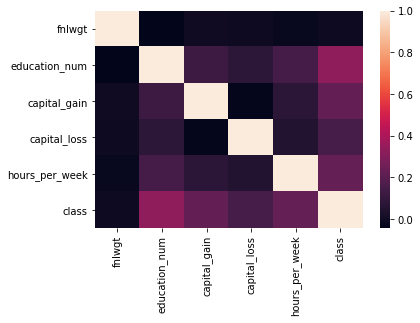

In [31]:
sns.heatmap(corrmatrix,)

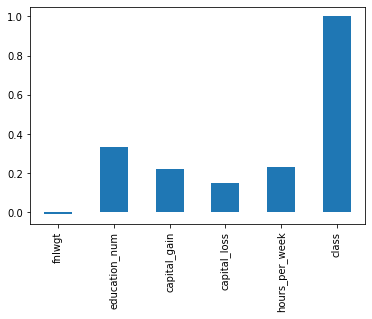

In [32]:
li=['fnlwgt','capital_gain','capital_loss','hours_per_week']
corrmatrix["class"].plot(kind="bar")

# Encoding

### Manual Encoding

In [33]:
cen["education"]=cen["education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',
                                               ' Some-college',' Assoc-voc',' Assoc-acdm',' Bachelors',' Masters',
                                               ' Prof-school',' Doctorate'],[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [34]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,class
0,Middle Aged,State-gov,77516,13,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,Old,Self-emp-not-inc,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,Middle Aged,Private,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,Old,Private,234721,7,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,Adults,Private,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### One Hot Encoding

In [35]:
cen.dtypes

age               category
workclass         category
fnlwgt               int64
education            int64
education_num        int64
marital_status    category
occupation          object
relationship        object
race                object
gender              object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
class                int64
dtype: object

In [36]:
cen["race"]=pd.Categorical(cen.race,[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'],ordered=False)

In [37]:
cen['gender']=pd.Categorical(cen.gender,[' Male', ' Female'],ordered=False)

In [38]:
dfrace=pd.get_dummies(cen["race"],prefix="Race")

In [39]:
dfgender=pd.get_dummies(cen["gender"],prefix="Gender")

In [40]:
cen=pd.concat([cen,dfrace],axis=1)
del cen["race"]

In [41]:
cen=pd.concat([cen,dfgender],axis=1)
del cen["gender"]

In [42]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,class,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Gender_ Male,Gender_ Female
0,Middle Aged,State-gov,77516,13,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,0,1,0,0,0,0,1,0
1,Old,Self-emp-not-inc,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,0,1,0,0,0,0,1,0
2,Middle Aged,Private,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,0,1,0,0,0,0,1,0
3,Old,Private,234721,7,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,0,0,1,0,0,0,1,0
4,Adults,Private,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,0,0,1,0,0,0,0,1


### Label Encoding

In [43]:
cen["occupation"]=pd.Categorical(cen.occupation)
cen["relationship"]=pd.Categorical(cen.relationship)
cen["native_country"]=pd.Categorical(cen.native_country)

In [44]:
cen.age=lbe.fit_transform(cen.age)
cen.workclass=lbe.fit_transform(cen.workclass)
cen.marital_status=lbe.fit_transform(cen.marital_status)
cen.occupation=lbe.fit_transform(cen.occupation)
cen.relationship=lbe.fit_transform(cen.relationship)
cen.native_country=lbe.fit_transform(cen.native_country)

In [45]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,class,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Gender_ Male,Gender_ Female
0,1,7,77516,13,13,4,0,1,2174,0,40,39,0,1,0,0,0,0,1,0
1,2,6,83311,13,13,2,3,0,0,0,13,39,0,1,0,0,0,0,1,0
2,1,4,215646,9,9,0,5,1,0,0,40,39,0,1,0,0,0,0,1,0
3,2,4,234721,7,7,2,5,0,0,0,40,39,0,0,1,0,0,0,1,0
4,0,4,338409,13,13,2,10,5,0,0,40,4,0,0,1,0,0,0,0,1


# Normalization

### Min Max Normalization

In [46]:
cen["fnlwgt"]=(cen["fnlwgt"]-cen["fnlwgt"].min())/(cen["fnlwgt"].max()-cen["fnlwgt"].min())

In [47]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,class,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Gender_ Male,Gender_ Female
0,1,7,0.044302,13,13,4,0,1,2174,0,40,39,0,1,0,0,0,0,1,0
1,2,6,0.048238,13,13,2,3,0,0,0,13,39,0,1,0,0,0,0,1,0
2,1,4,0.138113,9,9,0,5,1,0,0,40,39,0,1,0,0,0,0,1,0
3,2,4,0.151068,7,7,2,5,0,0,0,40,39,0,0,1,0,0,0,1,0
4,0,4,0.221488,13,13,2,10,5,0,0,40,4,0,0,1,0,0,0,0,1


### Decimal Scaling Normalization

In [48]:
cen["education_num"]=(cen["education_num"])/pow(10,len(str(cen["education_num"].max())))

In [49]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,class,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Gender_ Male,Gender_ Female
0,1,7,0.044302,13,0.13,4,0,1,2174,0,40,39,0,1,0,0,0,0,1,0
1,2,6,0.048238,13,0.13,2,3,0,0,0,13,39,0,1,0,0,0,0,1,0
2,1,4,0.138113,9,0.09,0,5,1,0,0,40,39,0,1,0,0,0,0,1,0
3,2,4,0.151068,7,0.07,2,5,0,0,0,40,39,0,0,1,0,0,0,1,0
4,0,4,0.221488,13,0.13,2,10,5,0,0,40,4,0,0,1,0,0,0,0,1


### Z Score Normalization

In [50]:
cen["capital_gain"]=(cen["capital_gain"]-cen["capital_gain"].mean())/(cen["capital_gain"].std())
cen["capital_loss"]=(cen["capital_loss"]-cen["capital_loss"].mean())/(cen["capital_loss"].std())
cen["hours_per_week"]=(cen["hours_per_week"]-cen["hours_per_week"].mean())/(cen["hours_per_week"].std())


In [51]:
cen.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,class,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Gender_ Male,Gender_ Female
0,1,7,0.044302,13,0.13,4,0,1,0.148451,-0.216656,-0.035429,39,0,1,0,0,0,0,1,0
1,2,6,0.048238,13,0.13,2,3,0,-0.145918,-0.216656,-2.222119,39,0,1,0,0,0,0,1,0
2,1,4,0.138113,9,0.09,0,5,1,-0.145918,-0.216656,-0.035429,39,0,1,0,0,0,0,1,0
3,2,4,0.151068,7,0.07,2,5,0,-0.145918,-0.216656,-0.035429,39,0,0,1,0,0,0,1,0
4,0,4,0.221488,13,0.13,2,10,5,-0.145918,-0.216656,-0.035429,4,0,0,1,0,0,0,0,1


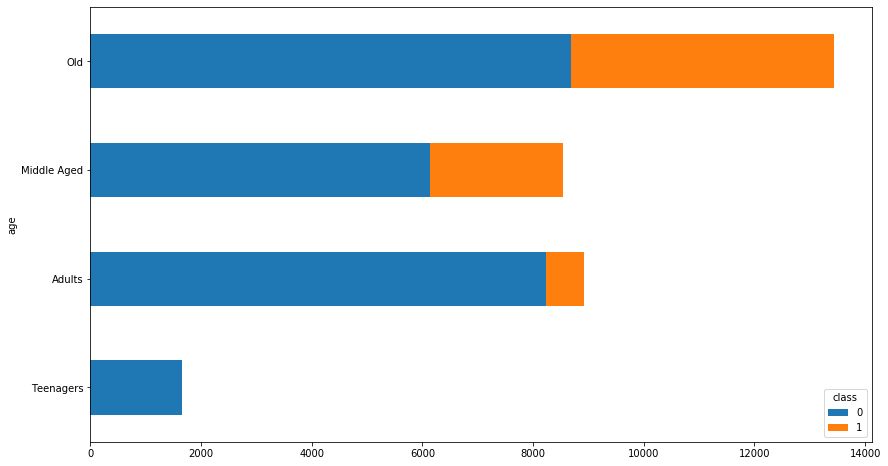

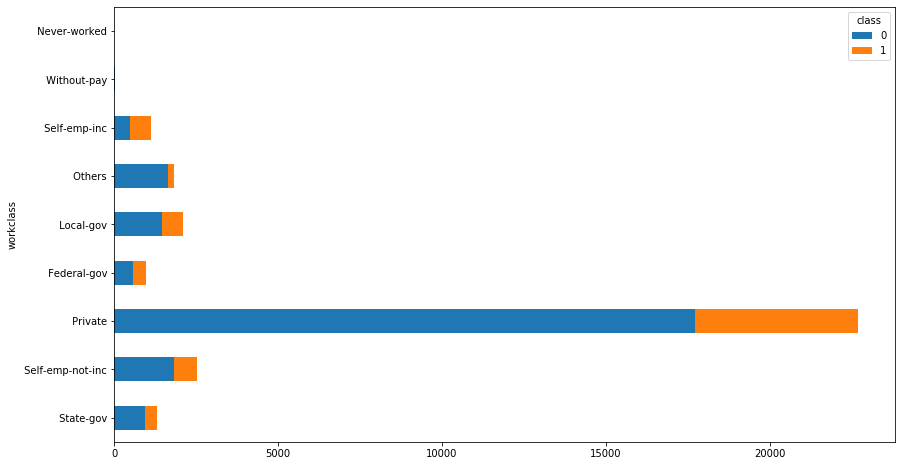

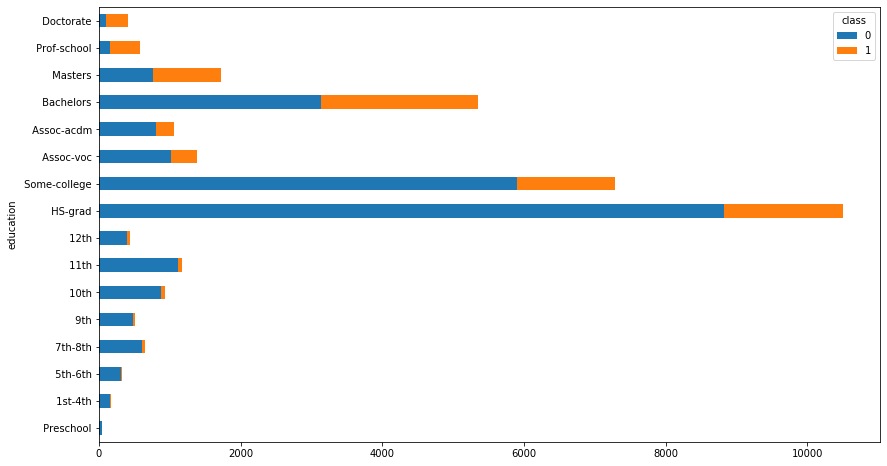

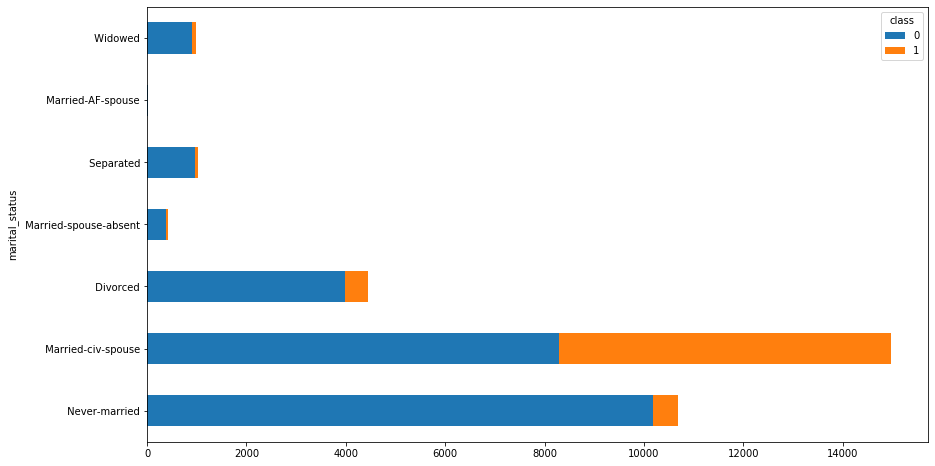

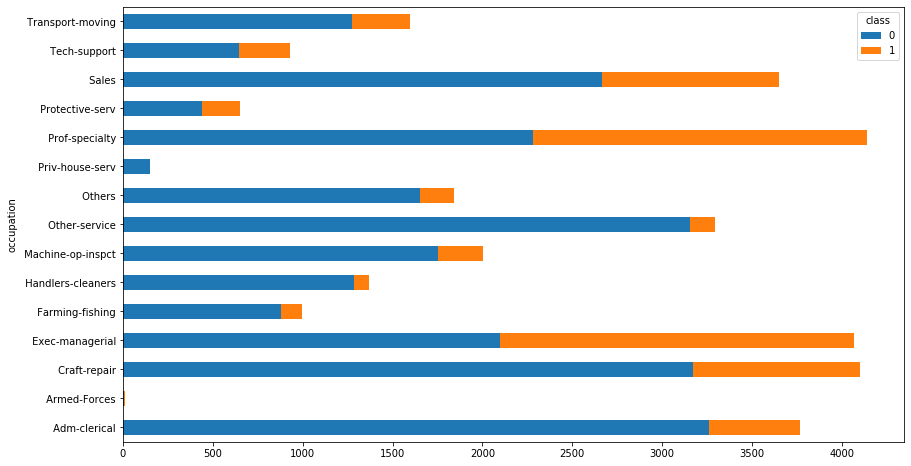

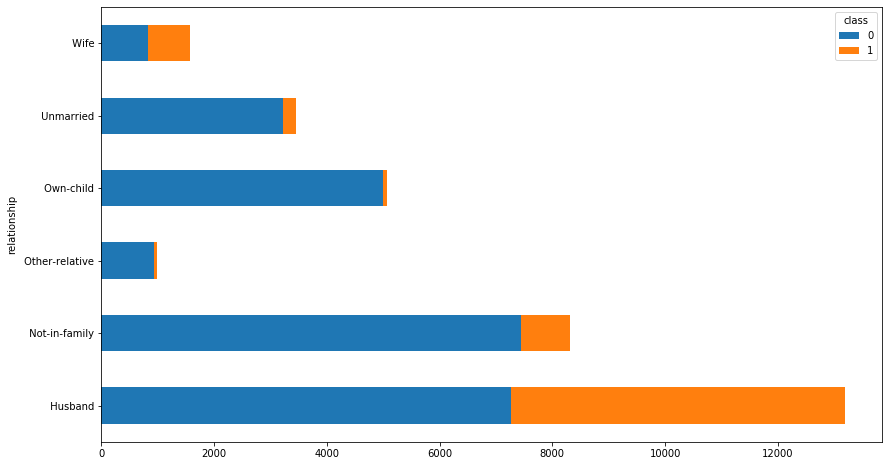

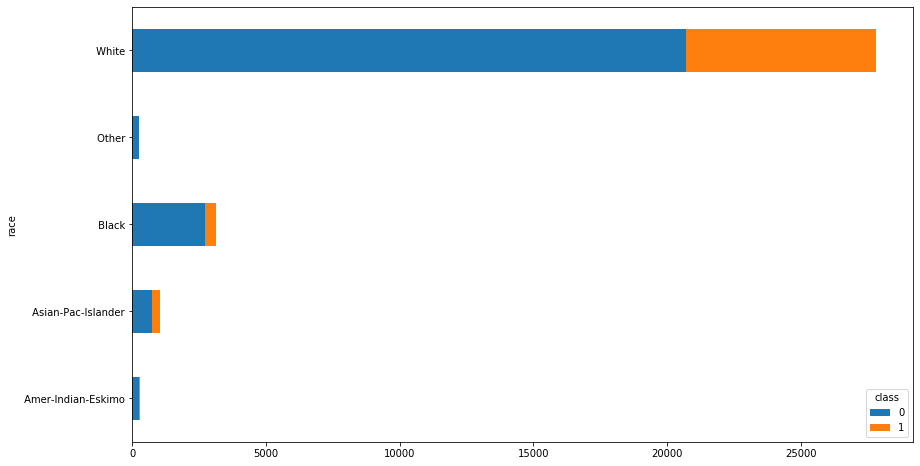

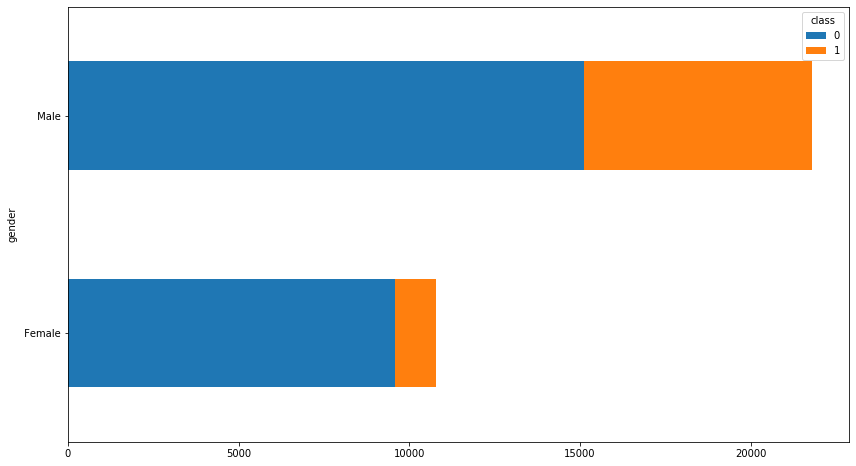

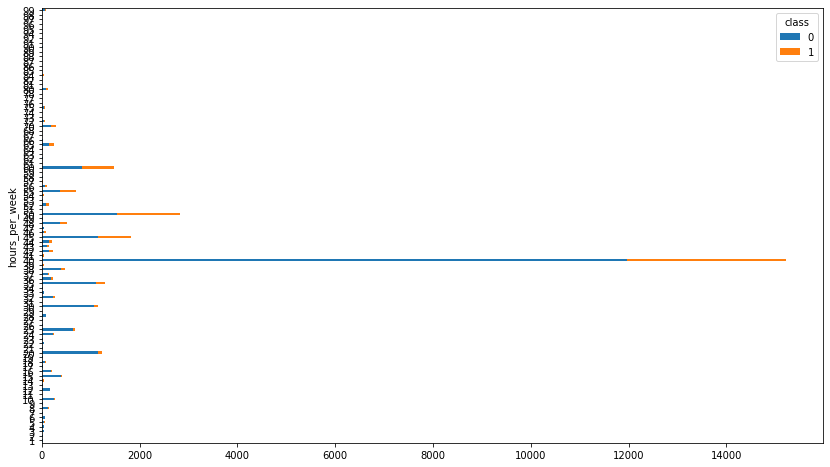

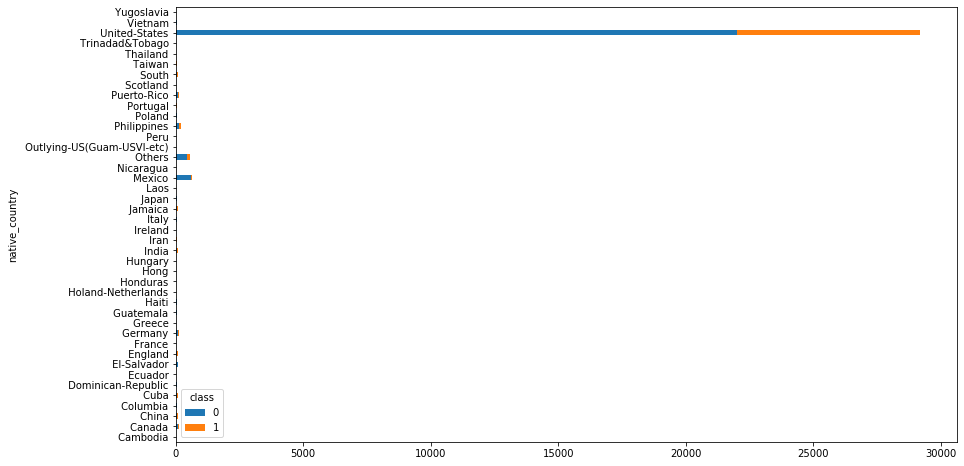

In [52]:
for i in range(len(tabli)):
    tabli[i].plot(kind="barh",figsize=(14,8),stacked=True)